In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
Iris = sqlite3.connect("Iris_DB.sqlite")

In [3]:
data = pd.read_sql_query("select * from iris", Iris)

In [4]:
Iris.close()

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Removing Unwanted Columns

In [8]:
data.drop('Id',axis=1,inplace=True)

In [9]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

`Here we could see that the class distribution of the target feature is equal`

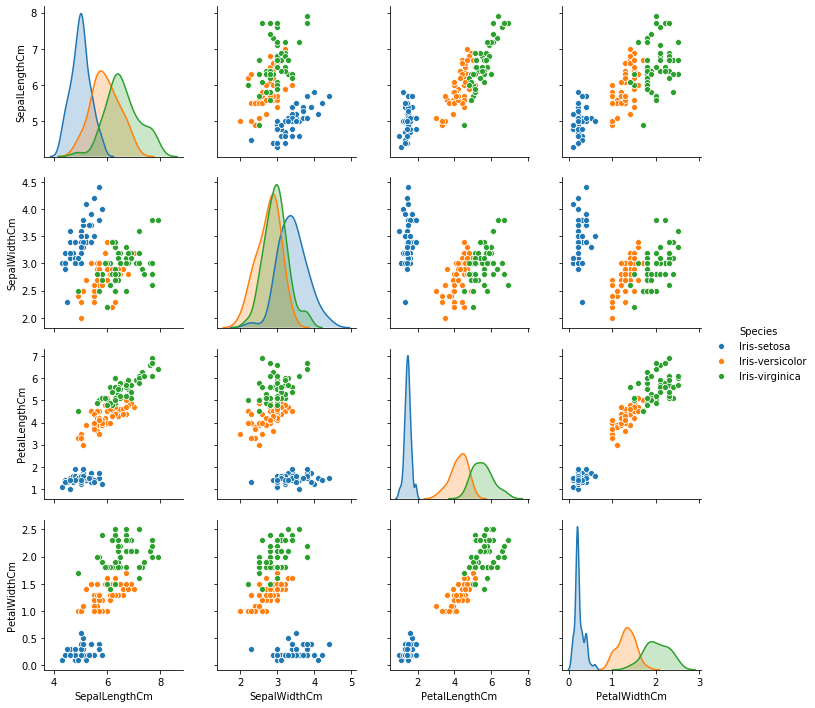

In [12]:
sns.pairplot(data,hue='Species')

***PetalLengthCm & PetalWidthCm are to be the most important feature to identify the species. Since, they have a strong linear relation.***

***The Sestosa species can be easily identified and linearly seperable but the Other species: Versicolor & Virginica are overlapping and hard to be linearly seperable.***

In [13]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [14]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [15]:
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

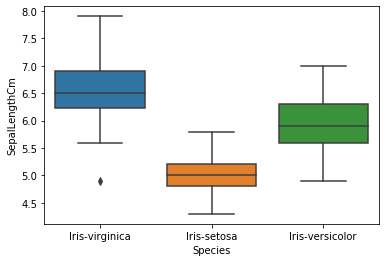

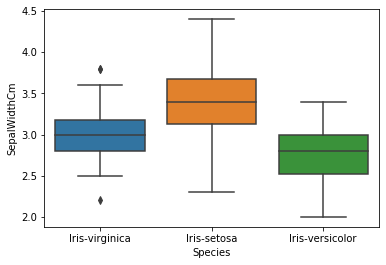

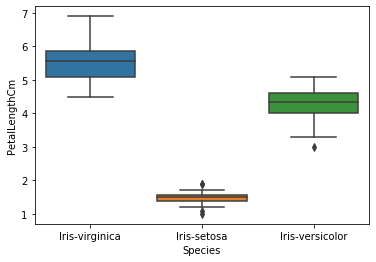

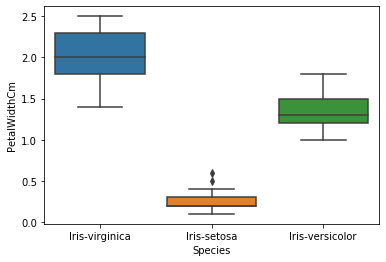

In [16]:
for col in num_cols:
    sns.boxplot(x='Species',y=col,data=data,order=['Iris-virginica','Iris-setosa','Iris-versicolor'],orient='v')
    plt.show()

*The Iris-virginica species has higest* ***SepalLength*** *amongst other species*

*The Iris-setosa species has highest* ***SepalWidth*** *amongst other species*

*The Iris-virginica species has highest* ***PetalLength*** *amongst other species*

*The Iris-virginica species has highest* ***PetalWidth*** *amongst other species*

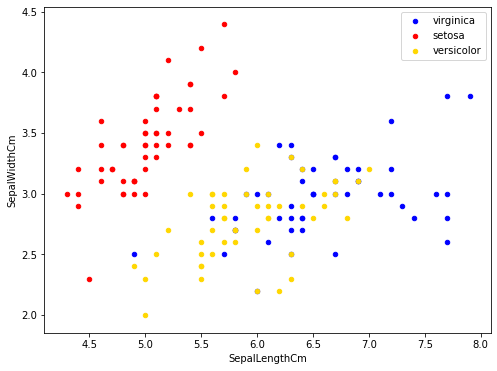

In [17]:
fig = data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm', y='SepalWidthCm', color='b', label='virginica')
data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm', y='SepalWidthCm', color='r', label='setosa',ax=fig)
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm', y='SepalWidthCm', color='gold', label='versicolor',ax=fig)
fig.set_xlabel='SepalLength'
fig.set_ylabel='SepalWidth'
fig.set_title='SepalLength Vs SepalWidth'
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

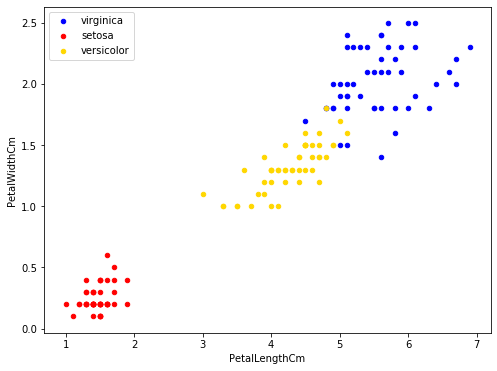

In [18]:
fig = data[data.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm', y='PetalWidthCm', color='b', label='virginica')
data[data.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm', y='PetalWidthCm', color='r', label='setosa',ax=fig)
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm', y='PetalWidthCm', color='gold', label='versicolor',ax=fig)
fig.set_xlabel='PetalLength'
fig.set_ylabel='PetalWidth'
fig.set_title='PetalLength Vs PetalWidth'
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

***the Petal Features gives a better cluster division compared to the Sepal features.This is an indication that the Petals can help in better and accurate Classification over the Sepal.***

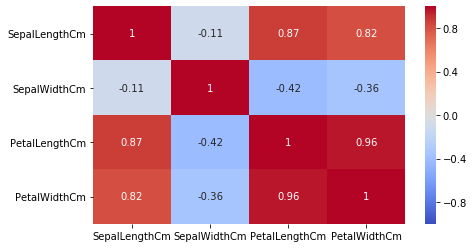

In [19]:
plt.figure(figsize=(7,4))
sns.heatmap(data.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

***The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated.***

#### Statistical Test:

In [20]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
#ANOVA Test:

data_gr=data.groupby('Species')
data_gr1=data_gr.get_group('Iris-virginica')
data_gr2=data_gr.get_group('Iris-setosa')
data_gr3=data_gr.get_group('Iris-versicolor')

In [22]:
from scipy.stats import f_oneway

In [23]:
f_oneway(data_gr1['SepalLengthCm'],data_gr2['SepalLengthCm'],data_gr3['SepalLengthCm'])

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

In [24]:
f_oneway(data_gr1['SepalWidthCm'],data_gr2['SepalWidthCm'],data_gr3['SepalWidthCm'])

F_onewayResult(statistic=47.36446140299383, pvalue=1.3279165184572065e-16)

In [25]:
f_oneway(data_gr1['PetalLengthCm'],data_gr2['PetalLengthCm'],data_gr3['PetalLengthCm'])

F_onewayResult(statistic=1179.0343277002241, pvalue=3.051975801826989e-91)

In [26]:
f_oneway(data_gr1['PetalWidthCm'],data_gr2['PetalWidthCm'],data_gr3['PetalWidthCm'])

F_onewayResult(statistic=959.3244057257591, pvalue=4.376956957489586e-85)

***For 95% Confidence Interval all the features have P-value less than 0.05. So we can add all the variables into our model.***

In [28]:
data['Species']=data['Species'].replace({'Iris-virginica':0,'Iris-setosa':1,'Iris-versicolor':2})

#### Modelling

In [29]:
X= data.drop('Species',axis=1)
y=data['Species']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
print(X.head(3))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2


In [32]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: Species, Length: 150, dtype: int64


### Logistic Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

LR = LogisticRegression(random_state=42)
LR.fit(X_train,y_train)

C:\Users\Bhuva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhuva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred_LR=LR.predict(X_test)

In [35]:
print('The accuracy of the Train is',LR.score(X_train,y_train))
print('The accuracy of the Test is',metrics.accuracy_score(y_test,y_pred_LR))

The accuracy of the Train is 0.9619047619047619
The accuracy of the Test is 0.9777777777777777


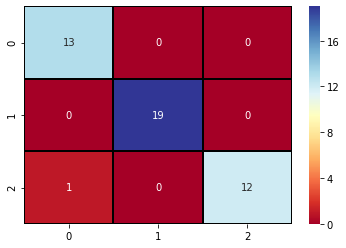

In [36]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred_LR),
            cmap='RdYlBu',linewidths=1,linecolor='k',
            annot=True);

### KNN Model

In [37]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
y_pred_KNN = KNN.predict(X_test)

In [39]:
print('The accuracy of the Train is',KNN.score(X_train,y_train))
print('The accuracy of the Test is',metrics.accuracy_score(y_test,y_pred_KNN))

The accuracy of the Train is 0.9523809523809523
The accuracy of the Test is 1.0


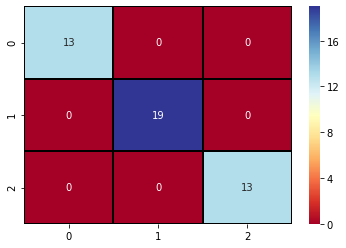

In [40]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred_KNN),
            cmap='RdYlBu',linewidths=1,linecolor='k',
            annot=True);

### Decision Tree Model

In [41]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
y_pred_DT = DT.predict(X_test)

In [43]:
print('The accuracy of the Train is',DT.score(X_train,y_train))
print('The accuracy of the Test is',metrics.accuracy_score(y_test,y_pred_DT))

The accuracy of the Train is 1.0
The accuracy of the Test is 1.0


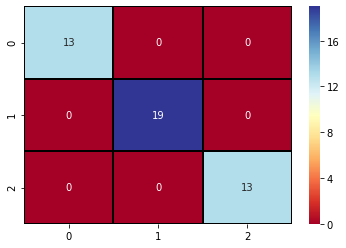

In [44]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred_DT),
            cmap='RdYlBu',linewidths=1,linecolor='k',
            annot=True);

***The Decision Tree is the better performing model than Logistic Regression and KNN.***

***We Suspect that the Decision Tree model is over fitting and not a Generalized Model, So we try to Model by removing the highly correlated features.***

#### Removing 'PetalLengthCm':

In [45]:
X= data.drop(['Species','PetalLengthCm'],axis=1)
y=data['Species']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Logistic Regression Model

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

LR = LogisticRegression()
LR.fit(X_train,y_train)

C:\Users\Bhuva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhuva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred_LR=LR.predict(X_test)

In [49]:
print('The accuracy of the Train is',LR.score(X_train,y_train))
print('The accuracy of the Test is',metrics.accuracy_score(y_test,y_pred_LR))

The accuracy of the Train is 0.8952380952380953
The accuracy of the Test is 0.9333333333333333


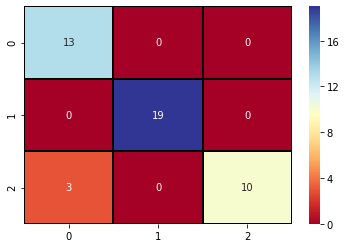

In [50]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred_LR),
            cmap='RdYlBu',linewidths=1,linecolor='k',
            annot=True);

### KNN Model

In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
y_pred_KNN = KNN.predict(X_test)

In [53]:
print('The accuracy of the Train is',KNN.score(X_train,y_train))
print('The accuracy of the Test is',metrics.accuracy_score(y_test,y_pred_KNN))

The accuracy of the Train is 0.9619047619047619
The accuracy of the Test is 0.9555555555555556


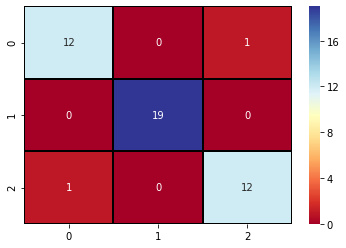

In [54]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred_KNN),
            cmap='RdYlBu',linewidths=1,linecolor='k',
            annot=True);

### Decision Tree Model

In [55]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
y_pred_DT = DT.predict(X_test)

In [57]:
print('The accuracy of the Train is',DT.score(X_train,y_train))
print('The accuracy of the Test is',metrics.accuracy_score(y_test,y_pred_DT))

The accuracy of the Train is 1.0
The accuracy of the Test is 0.9777777777777777


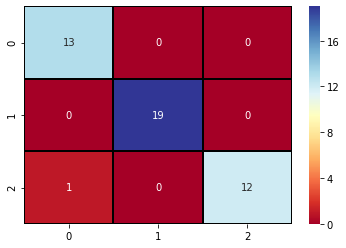

In [58]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred_DT),
            cmap='RdYlBu',linewidths=1,linecolor='k',
            annot=True);

***We Can See That The KNN Model is the performing better as a generalised model than Logistic Regression and Decision Tree.***